# Matrix Product State

We will use two package in this tutorial:


- `Images`: for visualizing images
- `MNIST`: for loading MNIST dataset
- `GR`: for plotting

original `MNIST` is deprecated, to save time, please this custom version:

```julia
Pkg.clone("https://github.com/Roger-luo/MNIST.jl.git")
```

And add other packages with the following commnad

```julia
Pkg.add("GR")
Pkg.add("Colors")
```

In [1]:
using Images, MNIST, GR

load training data from mnist

In [2]:
images, labels = traindata();

### Data loading
We load $100$ MNIST images by slicing the MNIST trainning data.  
Each image contains $n=28\times 28=784$ pixels, each of which takes value $0$ or $1$.  
In our settings, each image is viewed as a product state in the Hilbert space of  dimension $2^n$.

Gray images can be just an array of `Gray` pixels in julia.

,,,,,,,
,,,,,,,

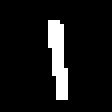
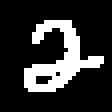
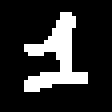
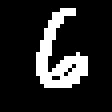
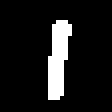
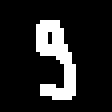
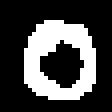
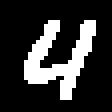
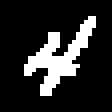
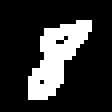
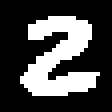
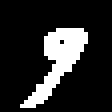
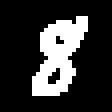
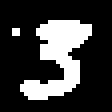
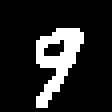
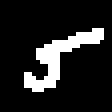

In [3]:
data = reshape(images[:, 1:100], 28, 28, 100)
ncols = 8
[Gray.(data[:, :, i+j*ncols]) for i = 1:2, j=1:ncols]

then convert them into binary images, you can convert an gray image to a binary image by set a threshold.

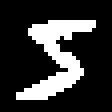

In [4]:
img = Gray.(data[:, :, 1])
img = Gray.(img .> 0.5)

In [5]:
bdata = zeros(Bool, 28, 28, 100)

for i = 1:100
    bdata[:, :, i] = Gray.(data[:, :, i]) .> 0.5
end

### MPS initialization
Define the mps, which is a list of 3-way tensors containing random values 
<img src="mps.png" width="350px"/>

In [9]:
n = 784 # number of qubits
m = 20 # m images
data = bdata[:, :, 1:m]
data = reshape(data, 784, m)
Dmax = 30 # maximum bond dimension
bond_dims = [i==n?1:Dmax for i in 1:n]
tensors = [randn(bond_dims[i], 2, bond_dims[i+1]) for i = 1:n-1];

Question: does the contration with one image give a probability of the image? Why?

Canonicalization using QR decompositions

In [ ]:
function orthogonalize(site, going_right)
    dl = bond_dims[site-1]
    d = bond_dims[site]
    if going_right
        A = view(tensors[site], dl * 2, d)
        Q, R = qr(A)
        normalize!(R) # nomralize with 2-norm
        tensors[site] = view(Q, dl, 2, :)
        tensors[site+1] = view(R .* tensors[site + 1], d, -1)
    end
end